#1.请导入数据集文件datamining01.csv,并查看(除表头外)前5行数据

#2.请统计出每列数据重的最大值、最小值、中位数、平均数以及四分位数

#1.请计算出每列中缺失值所占百分比，并输出结果，输出结果字段包括：字段名称、缺失值数量、缺失值占比

#2.将缺失值占比超过70%的列删除，并选取适当方法对缺失值占比低于70%的列的缺失值进行填充，并将处理后的数据生成新的数据集文件data01;

使用数据data_cluster.csv

#1、导入数据，统计行、列、时间日期
#2、查看数据重的最大值，最小值，中位数，平均数以及四分位数
#3、选择日期为20200319的数据判读空值处理并生成新数据集data_new
#4、按用户ID流量生成数据集data_new2
#5、选择用户ID为5的流量信息分析绘制柱形图
#6、选择用户ID为10的流量信息分布绘制饼形图

美国人口收入分析，使用数据集adult_inconn.csv

#1、加载数据，查看数据行列分布情况

#2、查看数据特征，最大值，最小值，中位数，平均数以及四分位数

#3、查看数据缺失值分布，并用柱形图表示

#4、创建新数据集、对target标签进行转化

#5、使用cut方法对age列数据进行分箱

#7、属性衍生

#10、将df转为str 

#11、引入KNN对数据进行预测

#12、选择模型最优参数

#13、重新生成模型knn_final

In [6]:
#15、重新对X_test进行预测

一、 描述DBSCAN的优缺点，应用场景有哪些?
DBSCAN 与其他聚类算法相比有很多优点。首先，它根本不需要固定数量的簇。它也会将异常值识别为噪声，而不像均值漂移，即使数据点非常不同，也会简单地将它们分入簇中。另外，它能够很好地找到任意大小和任意形状的簇。

DBSCAN 的主要缺点是当簇的密度不同时，它的表现不如其他聚类算法。这是因为当密度变化时，用于识别邻域点的距离阈值 ε 和 minPoints 的设置将会随着簇而变化。这个缺点也会在非常高维度的数据中出现，因为距离阈值 ε 再次变得难以估计。

In [ ]:
二、 DBSCAN与K-Means算法之间的区别

一、 查准率（Precision），召回率（Recall），F1-score的公式是什么？为什么选择F1-score？

二、 PR曲线绘图描述（问PR曲线的概念）

三、ROC曲线图的模型选择（如何使用ROC曲线图来选择模型），AUC面积的描述

四、解释ROC和AUC曲线是否适合不均衡数据？

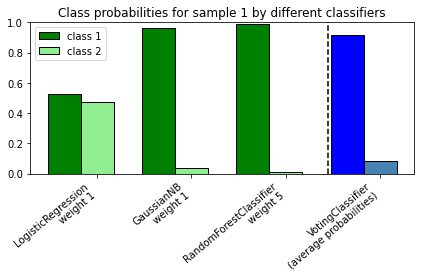

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf3 = GaussianNB()
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
y = np.array([1, 1, 2, 2])

eclf = VotingClassifier(
    estimators=[("lr", clf1), ("rf", clf2), ("gnb", clf3)],
    voting="soft",
    weights=[1, 1, 5],
)

# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "GaussianNB\nweight 1",
        "RandomForestClassifier\nweight 5",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()